# Decision Tree

A decision tree is one of the supervised machine learning algorithms. This algorithm can be used for regression and classification problems — yet, is mostly used for classification problems. As the name goes, it uses a tree-like model of decisions.

![](img/Decision_Tree.jpg)

### Terminology

**Root Node**: This attribute is used for dividing the data into two or more sets. The feature attribute in this node is selected based on Attribute Selection Techniques.  
<br>
**Branch or Sub-Tree**: A part of the entire decision tree is called branch or sub-tree.  
<br>
**Splitting**: Dividing a node into two or more sub-nodes based on if-else conditions.  
<br>
**Decision Node**: After splitting the sub-nodes into further sub-nodes, then it is called as the decision node.  
<br>
**Leaf or Terminal Node**: This is the end of the decision tree where it cannot be split into further sub-nodes.  
<br>
**Pruning:** Removing a sub-node from the tree is called pruning.  
<br>

### Splitting

We have 2 main splitting criteria to make decision how we split our data:
- Gini Index
- Information Gain

#### Gini Index
Gini Index, also known as Gini impurity, calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly. If all the elements are linked with a single class then it can be called pure.

Gini index varies between values 0 and 1, where 0 expresses the purity of classification, i.e. All the elements belong to a specified class or only one class exists there. And 1 indicates the random distribution of elements across various classes. The value of 0.5 of the Gini Index shows an equal distribution of elements over some classes.

Node gini index = $p^2 + q^2$  
Where:  
$p$: probability for success  
$q$: probability for failure ($1-p$)

Weighted Gini score of each node of that split = $\sum$ proportion of element in node $*$ gini index

![](\img/split.png)

**Split on Gender**:  
<br>
Calculate, Gini for sub-node Female = (0.2) * (0.2) + (0.8) * (0.8)=0.68  
Gini for sub-node Male = (0.65) * (0.65) + (0.35) * (0.35)=0.55  
Calculate weighted Gini for Split Gender = *(10/30)* * 0.68 + *(20/30)* * 0.55 = 0.59  
<br>
**Similar for Split on Class:**  
Gini for sub-node Class IX = (0.43) * (0.43)+ (0.57) * (0.57) = 0.51  
Gini for sub-node Class X = (0.56) * (0.56) + (0.44) * (0.44) = 0.51  
Calculate weighted Gini for Split Class = (14/30) * 0.51 + (16/30) * 0.51 = 0.51  

Above, you can see that Gini score for Split on Gender is higher than Split on Class, hence, the node split will take place on Gender.

#### Information Gain

Information Gain is applied to quantify which feature provides maximal information about the classification based on the notion of entropy, i.e. by quantifying the size of uncertainty, disorder or impurity, in general, with the intention of decreasing the amount of entropy initiating from the top (root node) to bottom(leaves nodes).  

Less impure node requires less information to describe it. And, more impure node requires more information. Information theory is a measure to define this degree of disorganization in a system known as Entropy. If the sample is completely homogeneous, then the entropy is zero and if the sample is an equally divided (50% – 50%), it has entropy of one.  
<br>
Information Gain = entropy (parent) - weighted average * entropy (children)  
<br>
Entropy = $-p \log_np - q \log_nq$  
<br>
Where:
<br>
$p$: probability for success
<br>
$q$: probability for failure ($1-p$)
<br>
$n$: number of classes in label


<U>Example:</u>
<br>
Entropy for parent node = -(15/30) $\log_2$ (15/30) – (15/30) $\log_2$ (15/30) = 1. Here 1 shows that it is a impure node.   
<br>
Entropy for Female node = -(2/10) $\log_2$ (2/10) – (8/10) $\log_2$ (8/10) = 0.72 and for male node,  -(13/20) log2 (13/20) – (7/20) log2 (7/20) = 0.93  
<br>
Entropy for split Gender = Weighted entropy of sub-nodes = (10/30) * 0.72 + (20/30) * 0.93 = 0.86  
<br>
Entropy for Class IX node, -(6/14) $\log_2$ (6/14) – (8/14) $\log_2$ (8/14) = 0.99 and for Class X node,  -(9/16) $\log_2$ (9/16) – (7/16) $\log_2$ (7/16) = 0.99.  
<br>
Entropy for split Class =  (14/30) * 0.99 + (16/30) * 0.99 = 0.99  

Above, you can see that entropy for Split on Gender is the lowest among all, so the tree will split on Gender. We can derive information gain from entropy as **1- Entropy**. The lesser the entropy, the better it is.

### Advantages of Decision Trees
- Simple to understand, interpret, visualize.
- Decision tree algorithm implementation can be done without scaling the data as well.
- Decision trees implicitly perform variable screening or feature selection.
- Nonlinear relationships between parameters do not affect tree performance.  
<br>  

### Disadvantages of Decision Trees
- Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This is called variance, which needs to be lowered by methods like bagging and boosting.
- Greedy algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees, where the features and samples are randomly sampled with replacement.(Random Forests)

---

# Code

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Read Data

In [21]:
data = pd.read_csv("datasets/iris.csv")

In [22]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Describe

In [23]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [25]:
data.groupby(by="Species").count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


## Visualize

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

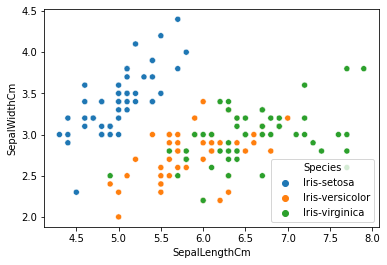

In [26]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=data)

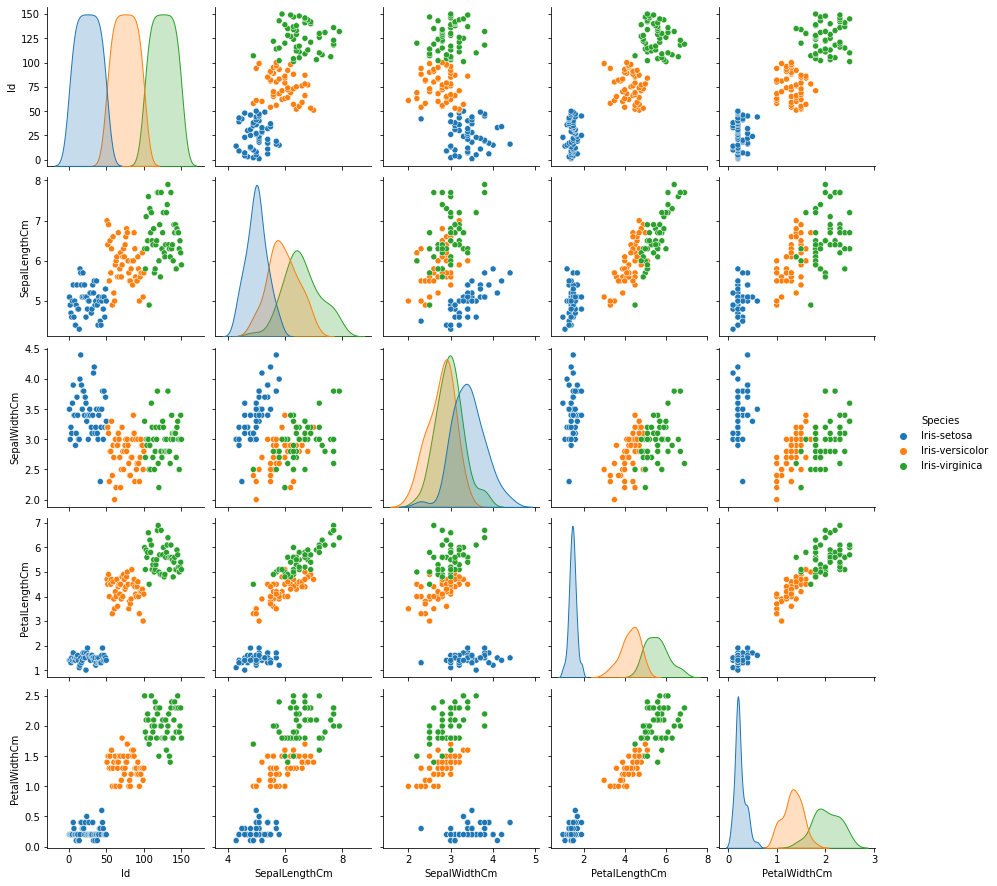

In [9]:
sns.pairplot(data, hue="Species")

## Data Preprocessing

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
label_encoder = LabelEncoder()

data["Label"] = label_encoder.fit_transform(data["Species"]) 
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Label
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [29]:
data["Label"].value_counts()

2    50
1    50
0    50
Name: Label, dtype: int64

In [30]:
categories = list(label_encoder.inverse_transform([0, 1, 2]))
categories

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [31]:
classes = list(set(data.Species))

data.drop(["Id","Species"], axis=1, inplace=True)

In [32]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [33]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

## Model

In [35]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)

clf.fit(X_train, y_train)

print("Accuracy of train:", clf.score(X_train, y_train))
print("Accuracy of test:", clf.score(X_test, y_test))

Accuracy of train: 0.99
Accuracy of test: 0.96


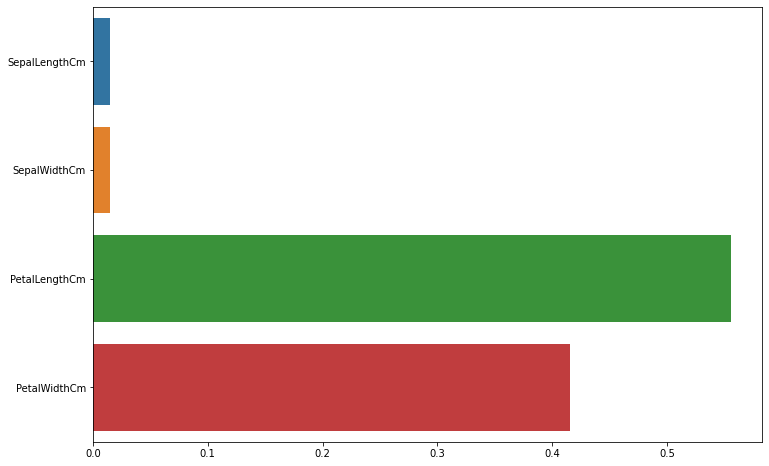

In [36]:
#Feature Importance
plt.figure(figsize=(12, 8))

importance = clf.feature_importances_

sns.barplot(x=importance, y=X.columns)
plt.show()

In [37]:
importance

array([0.01455535, 0.01534213, 0.55508492, 0.4150176 ])

In [46]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score

pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.85      1.00      0.92        11
           2       1.00      0.89      0.94        19

    accuracy                           0.96        50
   macro avg       0.95      0.96      0.95        50
weighted avg       0.97      0.96      0.96        50



In [52]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall    = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy  = {}".format(accuracy_score(y_test, pred)))
print("F1 Score  = {}".format(f1_score(y_test, pred, average='macro')))

Precision = 0.9487179487179488
Recall    = 0.9649122807017544
Accuracy  = 0.96
F1 Score  = 0.9537037037037036


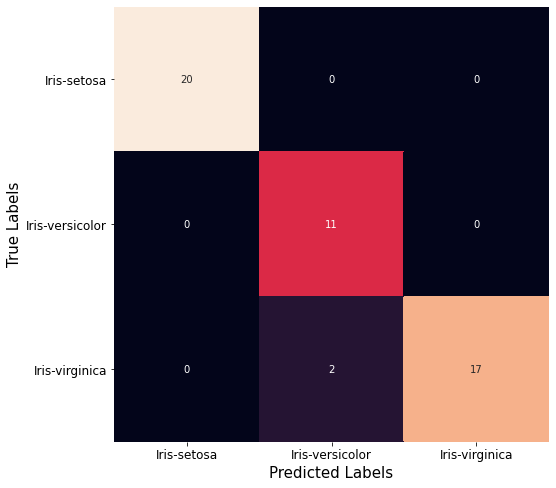

In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)

plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels', fontsize = 15)
plt.show()

### XGBoost

In [54]:
import xgboost as xgb

In [55]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [56]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [57]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.0046    , 0.9871078 , 0.00829213],
       [0.00398089, 0.00646372, 0.9895555 ],
       [0.00398902, 0.0044349 , 0.99157614],
       [0.00387317, 0.9924493 , 0.00367761],
       [0.9892699 , 0.00651816, 0.00421197],
       [0.04196233, 0.5648941 , 0.39314362],
       [0.0046    , 0.9871078 , 0.00829213],
       [0.9892699 , 0.00651816, 0.00421197],
       [0.9892699 , 0.00651816, 0.00421197],
       [0.0038679 , 0.9910994 , 0.00503268]], dtype=float32)

In [58]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [59]:
best_preds

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 1, 0, 0], dtype=int64)

## Metrics

In [61]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall    = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy  = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9285714285714285
Recall    = 0.9473684210526315
Accuracy  = 0.94


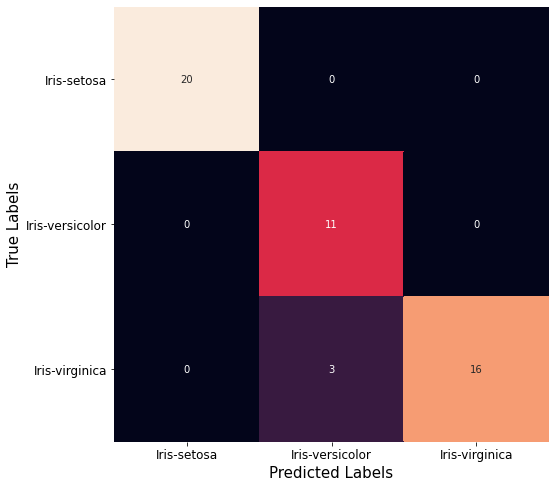

In [62]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, best_preds)
ax = sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()